In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

In [8]:
from agots.multivariate_generators.multivariate_data_generator import *

In [10]:
help(MultivariateExtremeOutlierGenerator)

Help on class MultivariateExtremeOutlierGenerator in module agots.multivariate_generators.multivariate_extreme_outlier_generator:

class MultivariateExtremeOutlierGenerator(agots.multivariate_generators.base.MultivariateOutlierGenerator)
 |  MultivariateExtremeOutlierGenerator(timestamps=None, factor_range=(8, 10))
 |  
 |  Method resolution order:
 |      MultivariateExtremeOutlierGenerator
 |      agots.multivariate_generators.base.MultivariateOutlierGenerator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, timestamps=None, factor_range=(8, 10))
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_outliers(self, timeseries)
 |  
 |  get_value(self, current_timestamp, timeseries)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from agots.multivariate_generators.base.MultivariateOutlierGenerator:
 |  
 |  __dict__
 |      dictionary for instance variables (if def

In [13]:
MultivariateExtremeOutlierGenerator(timestamps=[(50,), (190,)], factor_range=(8.0, 10.0))

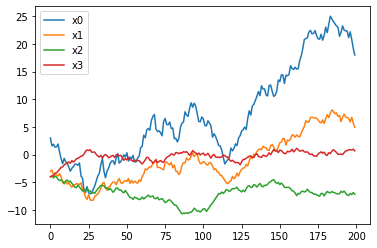

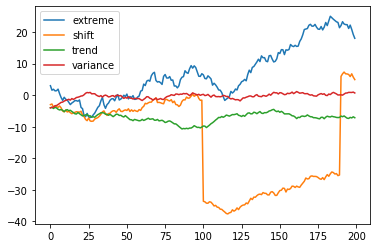

,x0,x1,x2,x3
0,3.000000,-3.000000,-4.000000,-4.000000
1,1.572558,-2.796408,-3.837190,-3.867646
2,1.873181,-3.736824,-4.210519,-3.813804
3,1.361140,-3.546805,-3.861269,-3.331156
4,1.408475,-3.665022,-4.050450,-3.296588
...,...,...,...,...
195,21.123842,6.553748,-7.364472,0.883275
196,22.186630,5.888479,-7.031556,0.876228
197,20.816212,6.757978,-7.213616,0.856251
198,19.224018,5.723776,-6.846544,0.972684


In [17]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)], 'factor_range': (8.0, 10.0)}],
                      'shift':   [{'n': 1, 'timestamps': [(100,190)], 'factor_range': (8.0, 10.0)}]})
#                       'trend':   [{'n': 2, 'timestamps': [(20, 150)]}],
#                       'variance':[{'n': 3, 'timestamps': [(50, 100)], 'factor_range': (16.0, 16.0)}]})

for col, label in zip(df.columns, ['extreme', 'shift', 'trend', 'variance']):
    plt.plot(df[col], label=label)
plt.legend()
plt.savefig('synthetic_anomaly_examples.png', dpi=400)
plt.show()
df